In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
#loading data

Barton_coefficients = np.loadtxt("outputs_ridge/lasso_coefficients_Barton.csv", delimiter=",")
Barton_stds = np.loadtxt("outputs_ridge/lasso_coefficients_std_Barton.csv", delimiter=",")

Corr_coefficients = np.loadtxt("outputs_ridge/lasso_coefficients_Corr.csv", delimiter=",")
Corr_stds = np.loadtxt("outputs_ridge/lasso_coefficients_std_Corr.csv", delimiter=",")

Yoon_coefficients = np.loadtxt("outputs_ridge/lasso_coefficients_Yoon.csv", delimiter=",")
Yoon_stds = np.loadtxt("outputs_ridge/lasso_coefficients_std_Yoon.csv", delimiter=",")

TFCE_coefficients = np.loadtxt("outputs_ridge/lasso_coefficients_TFCE.csv", delimiter=",")
TFCE_stds = np.loadtxt("outputs_ridge/lasso_coefficients_std_TFCE.csv", delimiter=",")

data_full = pd.read_csv('results/Predittori_tutti.csv')
X = data_full[["dx/sx", "Cons/prog", "Ind/col", "Flame", "Agreeableness", "Conscientiousness", "Em Stability", "Extroversion", "Openness", "Social Use"]]
# add the interactions
X["dx/sx*Cons/prog"] = X["dx/sx"] * X["Cons/prog"]
X["dx/sx*Ind/col"] = X["dx/sx"] * X["Ind/col"]
X["dx/sx*Flame"] = X["dx/sx"] * X["Flame"]
X["dx/sx*Agreeableness"] = X["dx/sx"] * X["Agreeableness"]
X["dx/sx*Conscientiousness"] = X["dx/sx"] * X["Conscientiousness"]
X["dx/sx*Em Stability"] = X["dx/sx"] * X["Em Stability"]
X["dx/sx*Extroversion"] = X["dx/sx"] * X["Extroversion"]
X["dx/sx*Openness"] = X["dx/sx"] * X["Openness"]
X["dx/sx*Social Use"] = X["dx/sx"] * X["Social Use"]


/tmp/ipykernel_16552/313624026.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dx/sx*Cons/prog"] = X["dx/sx"] * X["Cons/prog"]
/tmp/ipykernel_16552/313624026.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dx/sx*Ind/col"] = X["dx/sx"] * X["Ind/col"]
/tmp/ipykernel_16552/313624026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

/tmp/ipykernel_16552/3214166935.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].errorbar(np.arange(0, 19), Corr_coefficients, yerr=Corr_stds, marker='s', mfc = 'blue', fmt='o')
/tmp/ipykernel_16552/3214166935.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].errorbar(np.arange(0, 19), TFCE_coefficients, yerr=TFCE_stds, marker = 's', mfc = 'red', fmt='o')


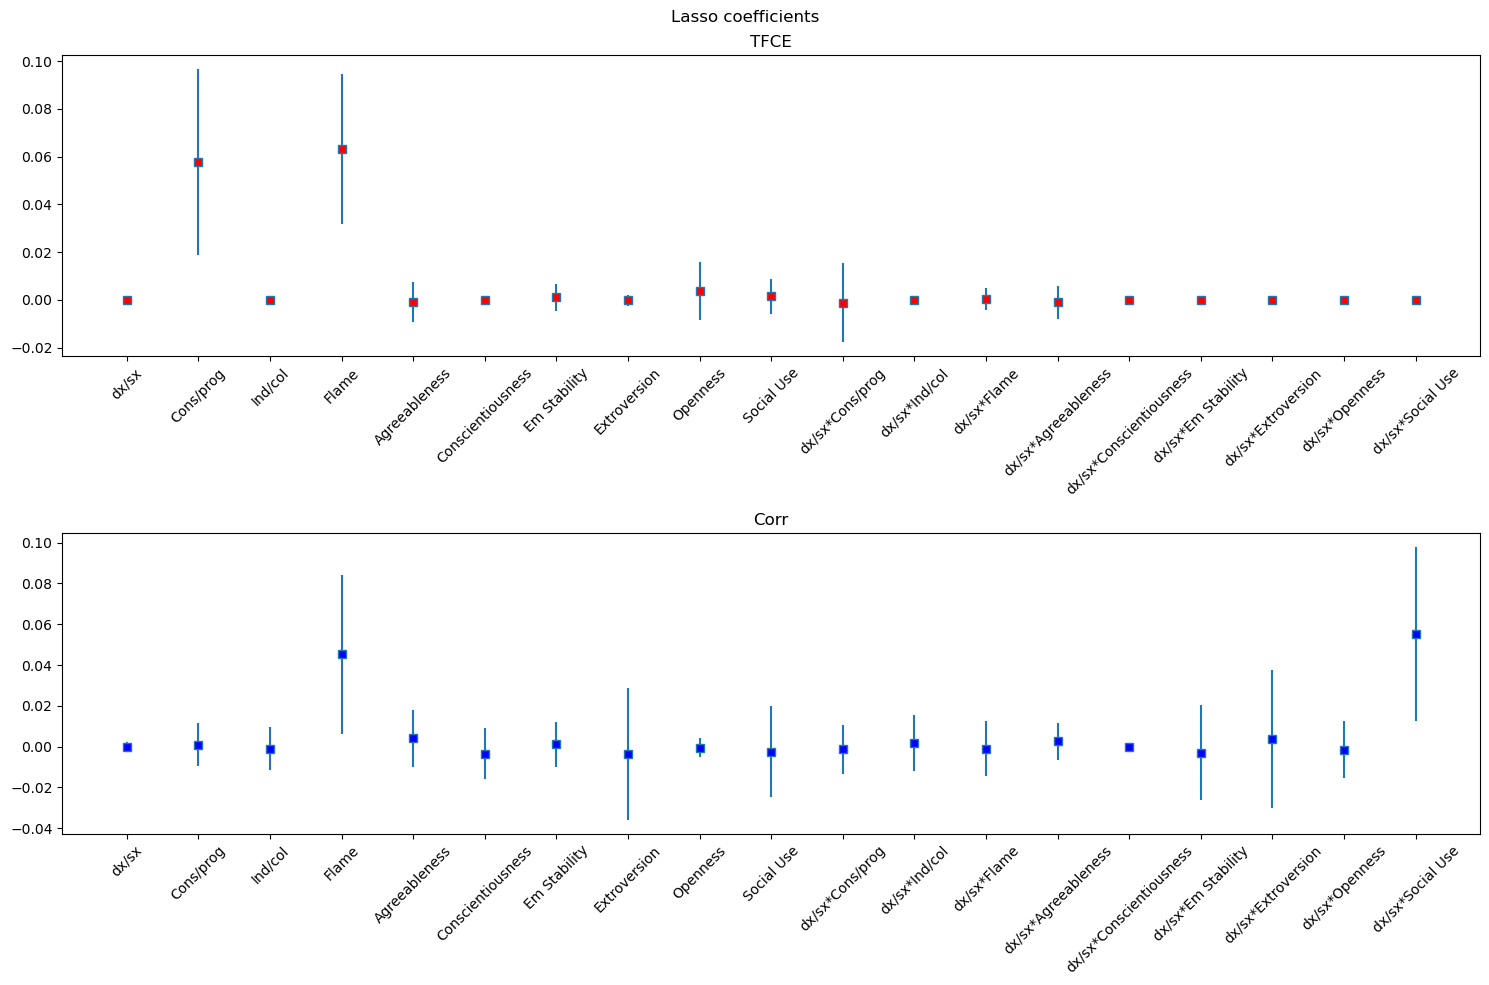

In [11]:
#plotting

fig, axs = plt.subplots(2,1, figsize=(15, 10))
fig.suptitle('Lasso coefficients')

#axs[0, 0].errorbar(np.arange(0, 19), Barton_coefficients, yerr=Barton_stds, fmt='o')
#axs[0, 0].set_title('Barton')
#axs[0, 0].set_xticks(np.arange(0, 19))
#axs[0, 0].set_xticklabels(X.columns, rotation=45)

axs[1].errorbar(np.arange(0, 19), Corr_coefficients, yerr=Corr_stds, marker='s', mfc = 'blue', fmt='o')
axs[1].set_title('Corr')
axs[1].set_xticks(np.arange(0, 19))
axs[1].set_xticklabels(X.columns, rotation=45)

#errorbar(x, y, yerr, marker='s', mfc='red',
         #mec='green', ms=20, mew=4)

#axs[1, 0].errorbar(np.arange(0, 19), Yoon_coefficients, yerr=Yoon_stds, fmt='o')
#axs[1, 0].set_title('Yoon')
#axs[1, 0].set_xticks(np.arange(0, 19))
#axs[1, 0].set_xticklabels(X.columns, rotation=45)

axs[0].errorbar(np.arange(0, 19), TFCE_coefficients, yerr=TFCE_stds, marker = 's', mfc = 'red', fmt='o')
axs[0].set_title('TFCE')
axs[0].set_xticks(np.arange(0, 19))
axs[0].set_xticklabels(X.columns, rotation=45)

plt.tight_layout()
plt.savefig('plots/lasso_coefficients.png')

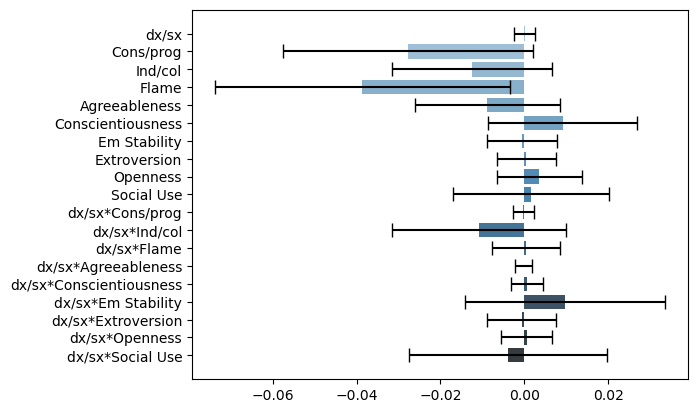

In [9]:
sns.barplot(x=Barton_coefficients, y = X.columns, yerr=Barton_stds, palette="Blues_d")
plt.errorbar(Barton_coefficients, range(19), xerr=Barton_stds, fmt='none', ecolor='black', capsize=5)
plt.savefig('plots/Barton.png')


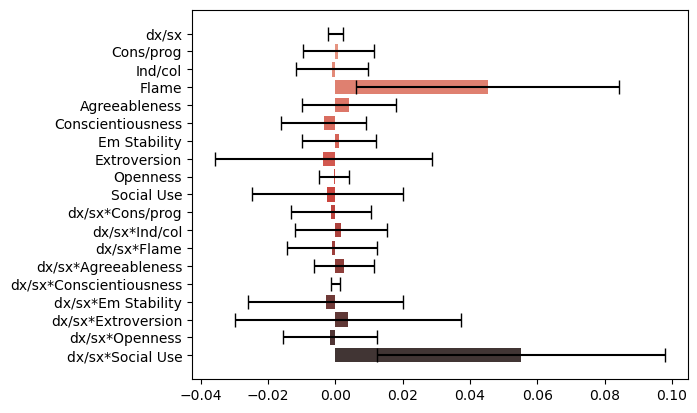

In [10]:
sns.barplot(x=Corr_coefficients, y = X.columns, yerr=Corr_stds, palette="Reds_d")
plt.errorbar(Corr_coefficients, range(19), xerr=Corr_stds, fmt='none', ecolor='black', capsize=5)
plt.savefig('plots/Corr.png')

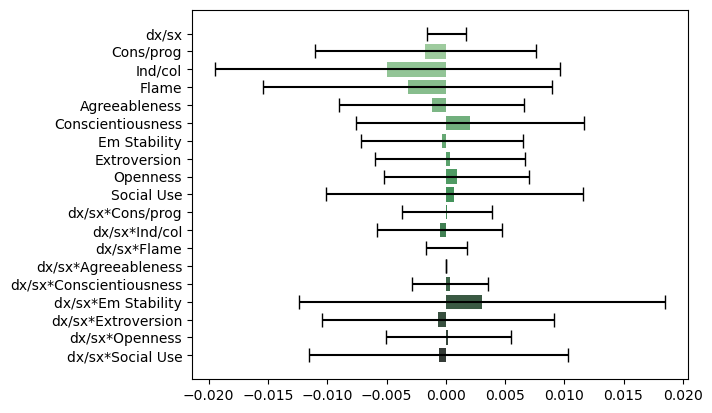

In [11]:
sns.barplot(x=Yoon_coefficients, y = X.columns, yerr=Yoon_stds, palette="Greens_d")
plt.errorbar(Yoon_coefficients, range(19), xerr=Yoon_stds, fmt='none', ecolor='black', capsize=5)
plt.savefig('plots/Yoon.png')

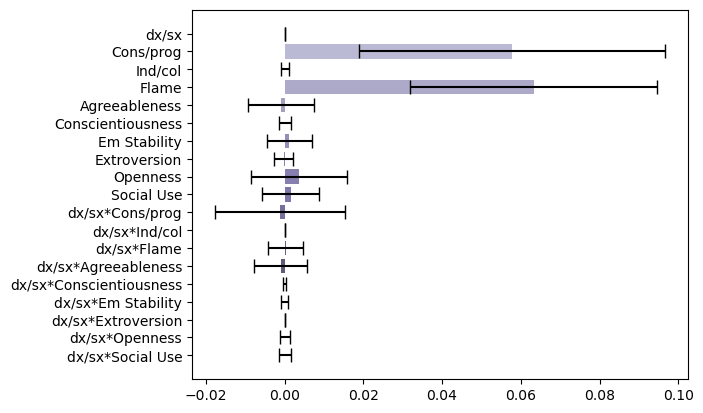

In [13]:
sns.barplot(x=TFCE_coefficients, y = X.columns, yerr=TFCE_stds, palette="Purples_d")   
plt.errorbar(TFCE_coefficients, range(19), xerr=TFCE_stds, fmt='none', ecolor='black', capsize=5)
plt.savefig('plots/TFCE.png')